In [8]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, decimate
from scipy.stats import ttest_ind, normaltest, levene, mannwhitneyu, shapiro
from statsmodels.tsa.stattools import adfuller

In [9]:
def calcular_rms(signal):
    N = len(signal)
    rms = np.sqrt(np.sum(np.square(signal)) / N)
    return rms

# Carga de datos, extraccion de señales, calculo del RMS y graficos de la señales

RMS ECG registrada: 4392.9682937490725
RMS ECG filtrada: 286.30557115249496
RMS EMG registrada 1: 1689.3071005776176
RMS EMG registrada 2: 3156.0533120007753
RMS EMG filtrada 1: 90.58225968421819
RMS EMG filtrada 2: 248.00722856373662


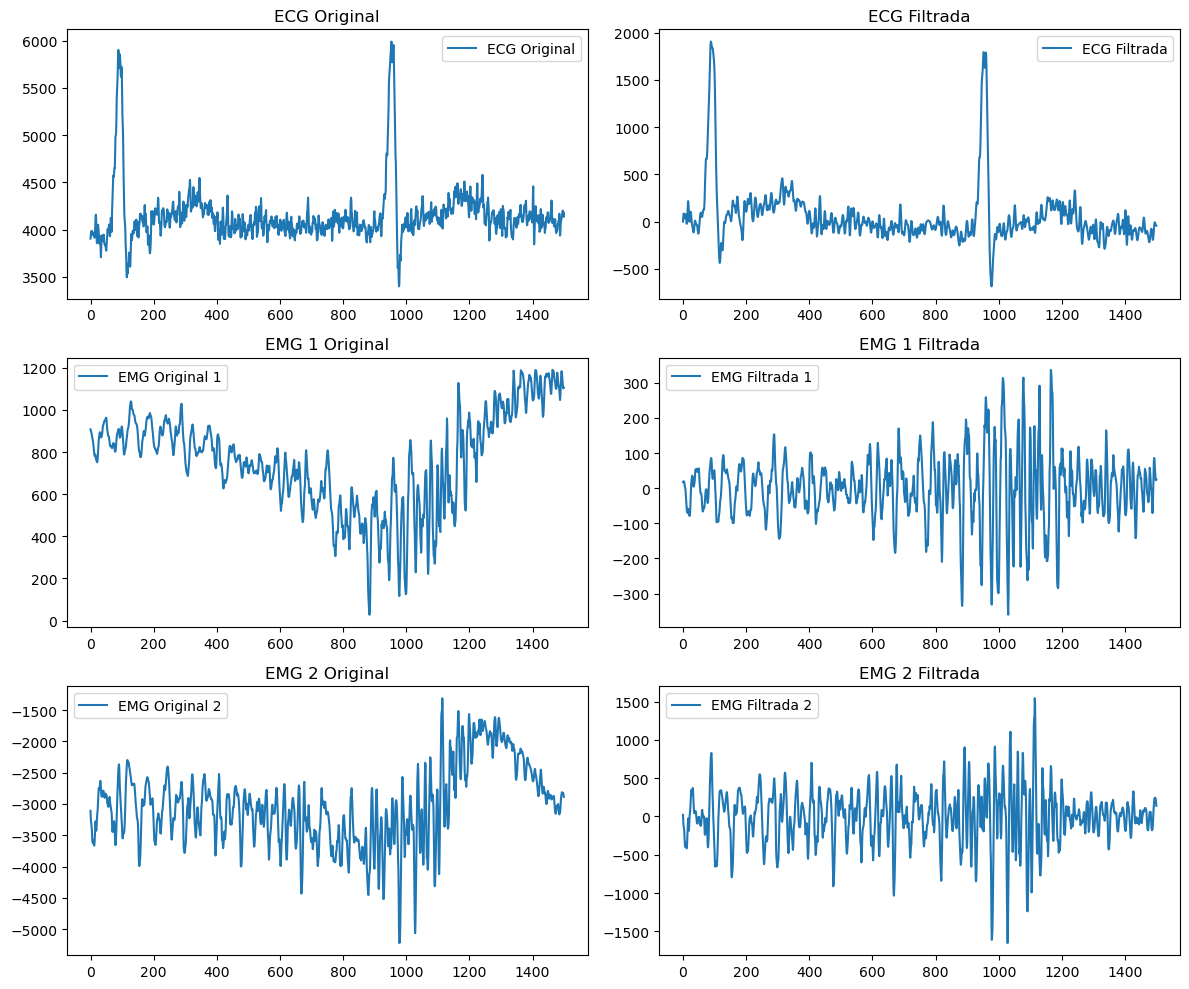

In [10]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
ecg_asRecording = archivo['ECG_asRecording'].flatten()  # Señal ECG registrada
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada
emg_asRecording1 = archivo['EMG_asRecording1'].flatten()  # Primer registro de EMG registrado
emg_asRecording2 = archivo['EMG_asRecording2'].flatten()  # Segundo registro de EMG registrado
emg_filtered1 = archivo['EMG_filtered1'].flatten()  # Primer registro de EMG filtrado
emg_filtered2 = archivo['EMG_filtered2'].flatten()  # Segundo registro de EMG filtrado

# Calcular el RMS para la señal registrada y la señal filtrada
rms_ecg_asRecording = calcular_rms(ecg_asRecording)
rms_ecg_filtered = calcular_rms(ecg_filtered)
rms_emg_asRecording1 = calcular_rms(emg_asRecording1)
rms_emg_asRecording2 = calcular_rms(emg_asRecording2)
rms_emg_filtered1 = calcular_rms(emg_filtered1)
rms_emg_filtered2 = calcular_rms(emg_filtered2)

# Mostrar valores RMS
print(f"RMS ECG registrada: {rms_ecg_asRecording}")
print(f"RMS ECG filtrada: {rms_ecg_filtered}")
print(f"RMS EMG registrada 1: {rms_emg_asRecording1}")
print(f"RMS EMG registrada 2: {rms_emg_asRecording2}")
print(f"RMS EMG filtrada 1: {rms_emg_filtered1}")
print(f"RMS EMG filtrada 2: {rms_emg_filtered2}")

# Definir el número de puntos a graficar
n_puntos = 1500  # Graficar solo los primeros 1500 puntos para ilustrar

# Graficar las señales decimadas
plt.figure(figsize=(12, 10))

# Graficar la señal ECG original
plt.subplot(3, 2, 1)
plt.plot(ecg_asRecording[:n_puntos], label='ECG Original')
plt.title('ECG Original')
plt.legend()

# Graficar la señal ECG filtrada
plt.subplot(3, 2, 2)
plt.plot(ecg_filtered[:n_puntos], label='ECG Filtrada')
plt.title('ECG Filtrada')
plt.legend()

# Graficar la señal EMG original 1
plt.subplot(3, 2, 3)
plt.plot(emg_asRecording1[:n_puntos], label='EMG Original 1')
plt.title('EMG 1 Original')
plt.legend()

# Graficar la señal EMG original 2
plt.subplot(3, 2, 5)
plt.plot(emg_asRecording2[:n_puntos], label='EMG Original 2')
plt.title('EMG 2 Original')
plt.legend()

# Graficar la señal EMG filtrada 1
plt.subplot(3, 2, 4)
plt.plot(emg_filtered1[:n_puntos], label='EMG Filtrada 1')
plt.title('EMG 1 Filtrada')
plt.legend()

# Graficar la señal EMG filtrada 2
plt.subplot(3, 2, 6)
plt.plot(emg_filtered2[:n_puntos], label='EMG Filtrada 2')
plt.title('EMG 2 Filtrada')
plt.legend()

plt.tight_layout()
plt.show()

# Graficar la señal sin filtrar y la señal filtrada

RMS ECG registrada: 4392.9682937490725
RMS ECG filtrada: 286.30557115249496


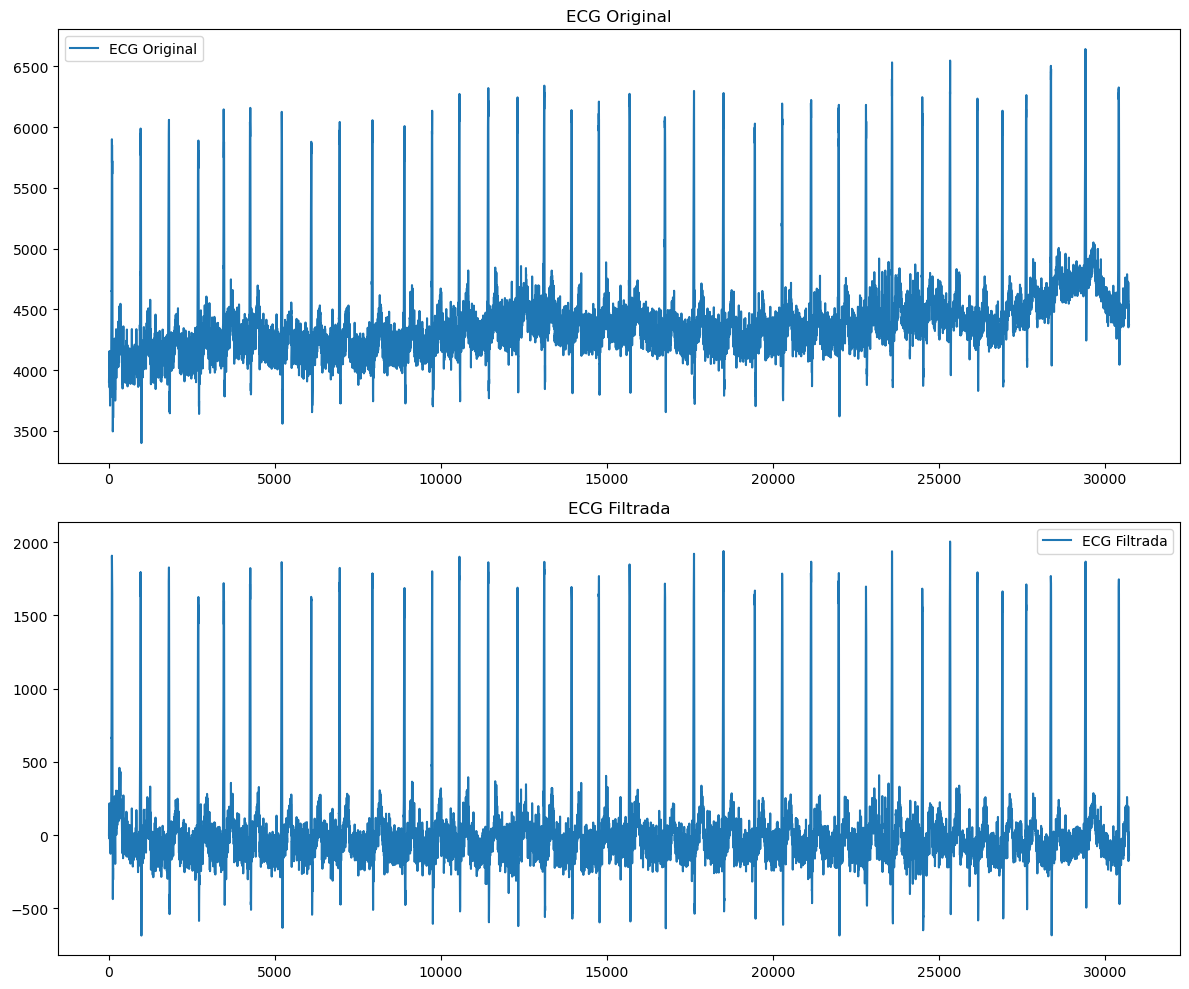

In [11]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
ecg_asRecording = archivo['ECG_asRecording'].flatten()  # Señal ECG registrada
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

# Calcular el RMS para la señal registrada y la señal filtrada
rms_ecg_asRecording = calcular_rms(ecg_asRecording)
rms_ecg_filtered = calcular_rms(ecg_filtered)

# Mostrar valores RMS
print(f"RMS ECG registrada: {rms_ecg_asRecording}")
print(f"RMS ECG filtrada: {rms_ecg_filtered}")

# Graficar las señales decimadas
plt.figure(figsize=(12, 10))

# Graficar la señal ECG original
plt.subplot(2, 1, 1)
plt.plot(ecg_asRecording[:], label='ECG Original')
plt.title('ECG Original')
plt.legend()

# Graficar la señal ECG filtrada
plt.subplot(2, 1, 2)
plt.plot(ecg_filtered[:], label='ECG Filtrada')
plt.title('ECG Filtrada')
plt.legend()

plt.tight_layout()
plt.show()

RMS EMG registrada 1: 1689.3071005776176
RMS EMG filtrada 1: 90.58225968421819


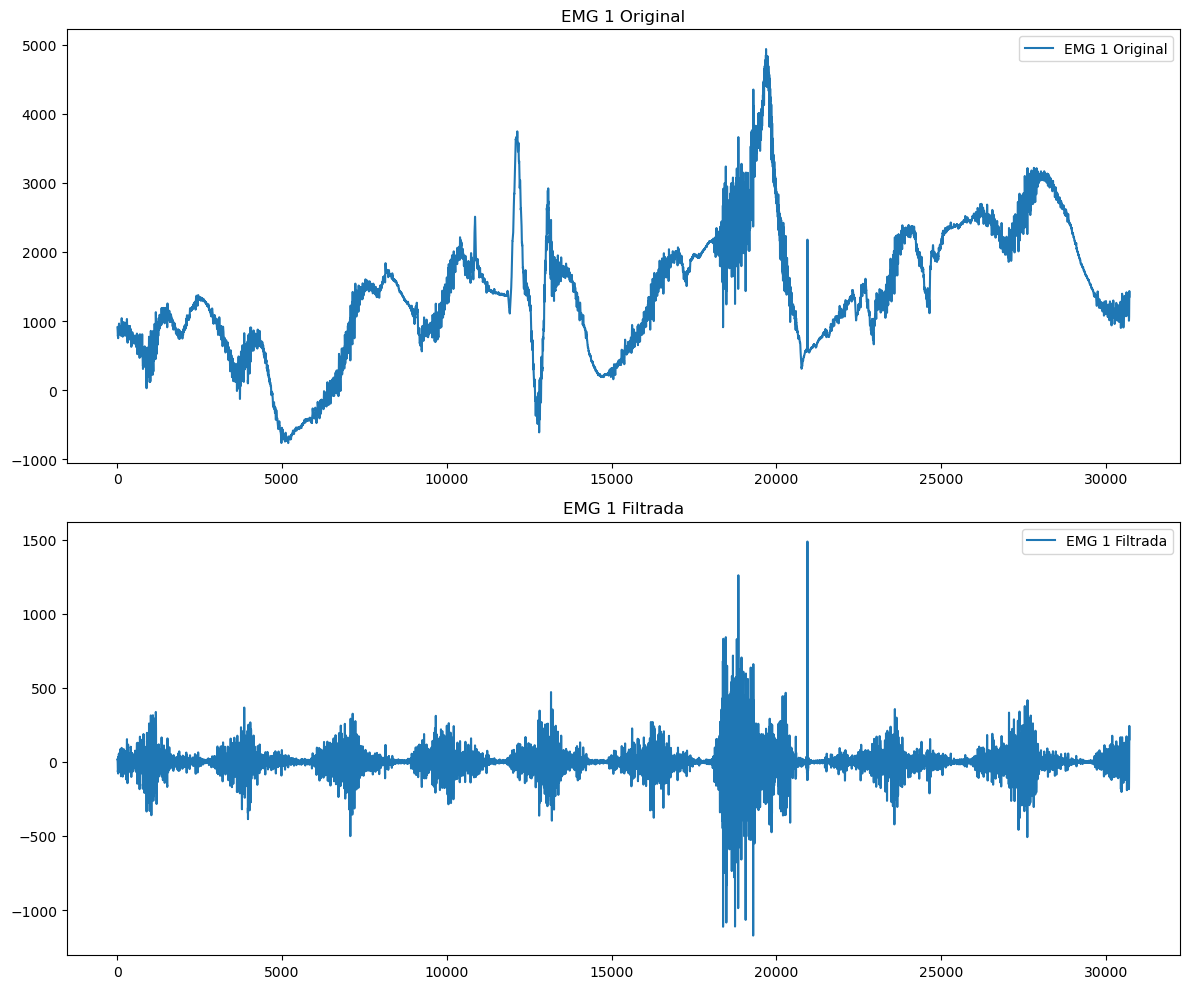

In [12]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
emg_asRecording1 = archivo['EMG_asRecording1'].flatten()  # Primer registro de EMG registrado
emg_filtered1 = archivo['EMG_filtered1'].flatten()  # Primer registro de EMG filtrado

# Calcular el RMS para la señal registrada y la señal filtrada
rms_emg_asRecording1 = calcular_rms(emg_asRecording1)
rms_emg_filtered1 = calcular_rms(emg_filtered1)

# Mostrar valores RMS
print(f"RMS EMG registrada 1: {rms_emg_asRecording1}")
print(f"RMS EMG filtrada 1: {rms_emg_filtered1}")

# Graficar las señales decimadas
plt.figure(figsize=(12, 10))

# Graficar la señal EMG original 1
plt.subplot(2, 1, 1)
plt.plot(emg_asRecording1[:], label='EMG 1 Original')
plt.title('EMG 1 Original')
plt.legend()

# Graficar la señal EMG filtrada 1
plt.subplot(2, 1, 2)
plt.plot(emg_filtered1[:], label='EMG 1 Filtrada')
plt.title('EMG 1 Filtrada')
plt.legend()

plt.tight_layout()
plt.show()

RMS EMG registrada 2: 3156.0533120007753
RMS EMG filtrada 2: 248.00722856373662


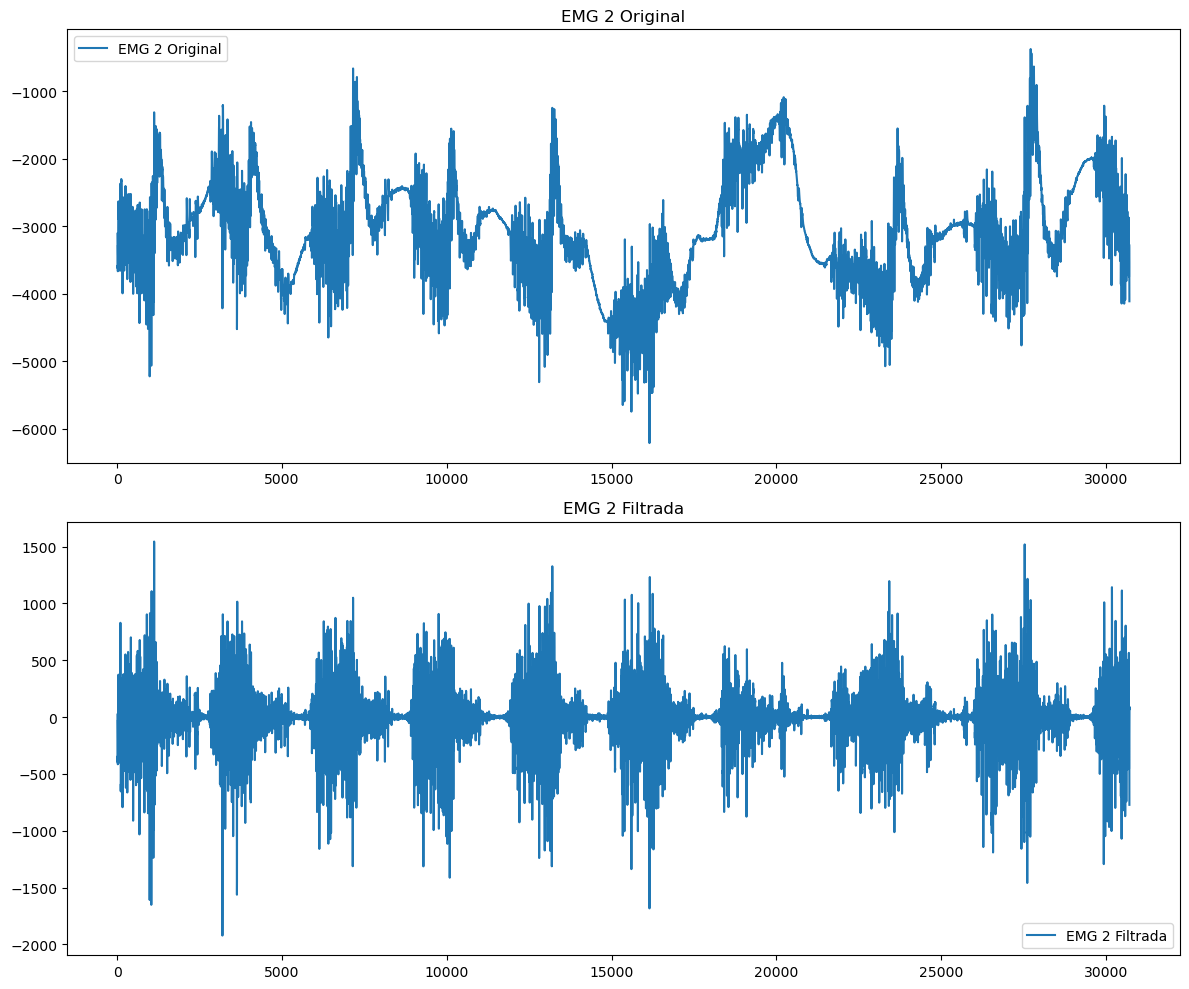

In [13]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
emg_asRecording2 = archivo['EMG_asRecording2'].flatten()  # Segundo registro de EMG registrado
emg_filtered2 = archivo['EMG_filtered2'].flatten()  # Segundo registro de EMG filtrado

# Calcular el RMS para la señal registrada y la señal filtrada
rms_emg_asRecording2 = calcular_rms(emg_asRecording2)
rms_emg_filtered2 = calcular_rms(emg_filtered2)

# Mostrar valores RMS
print(f"RMS EMG registrada 2: {rms_emg_asRecording2}")
print(f"RMS EMG filtrada 2: {rms_emg_filtered2}")

# Graficar las señales decimadas
plt.figure(figsize=(12, 10))

# Graficar la señal EMG original 2
plt.subplot(2, 1, 1)
plt.plot(emg_asRecording2[:], label='EMG 2 Original')
plt.title('EMG 2 Original')
plt.legend()

# Graficar la señal EMG filtrada 2
plt.subplot(2, 1, 2)
plt.plot(emg_filtered2[:], label='EMG 2 Filtrada')
plt.title('EMG 2 Filtrada')
plt.legend()

plt.tight_layout()
plt.show()

# Observaciones
Al graficar las señales originales versus las señales filtradas, se observa que el filtro parece eliminar un desplazamiento o "offset" presente en la señal original, llevándola hacia el origen en el eje Y, es decir, hacia un nivel de base cercano a cero. Esto sugiere que el filtro aplicado es un filtro de alta frecuencia o un filtro pasa altas, cuyo objetivo principal es eliminar componentes de baja frecuencia, como el desplazamiento de línea base o la tendencia de la señal. En el caso del ECG, los componentes de interés típicamente se encuentran entre 0.5 Hz y 150 Hz, siendo las frecuencias más bajas aquellas asociadas con el desplazamiento de la línea base y el ruido de baja frecuencia, como el movimiento de los electrodos o la respiración. Por tanto, el filtro elimina estas frecuencias no deseadas, preservando las características importantes del ECG, como las ondas P, QRS y T, que son cruciales para el análisis de la actividad cardíaca.

# referencias
- Rangayyan, R. M. (2015). Biomedical Signal Analysis: A Case-Study Approach. John Wiley & Sons.
- Webster, J. G. (2010). Medical Instrumentation: Application and Design. John Wiley & Sons.

# 3. Selección de un ciclo cardiaco y análisis estadístico


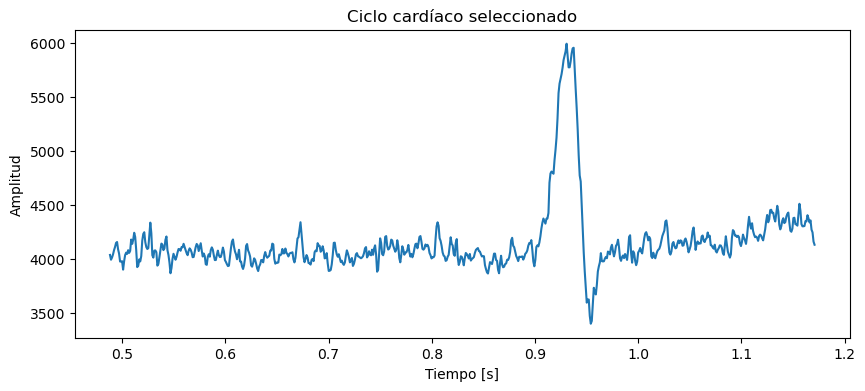

Promedio del ciclo: 4148.6782599748885
Valor RMS del ciclo: 4161.326979663616
Varianza del ciclo: 105110.92688803967
Desviación estándar del ciclo: 324.2081536421311


In [14]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
ecg_asRecording = archivo['ECG_asRecording'].flatten()  # Señal ECG registrada

# Calcular el RMS para la señal registrada
rms_ecg_asRecording = calcular_rms(ecg_asRecording)

# Crear un vector de tiempo
sampling_rate = 1024  # Frecuencia de muestreo en Hz
n_samples = len(ecg_asRecording)
t = np.arange(n_samples) / sampling_rate

# Seleccionar un ciclo cardiaco manualmente
start_idx = 500  # Índice de inicio
end_idx = 1200   # Índice de fin

ecg_ciclo = ecg_asRecording[start_idx:end_idx]  # Acceder a la señal en el instante deseado
t_ciclo = t[start_idx:end_idx]

# Graficar el ciclo seleccionado
plt.figure(figsize=(10, 4))
plt.plot(t_ciclo, ecg_ciclo)
plt.title('Ciclo cardíaco seleccionado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# Cálculo de estadísticas del ciclo
promedio = np.mean(ecg_ciclo)
rms = calcular_rms(ecg_ciclo)
varianza = np.var(ecg_ciclo)
desviacion_estandar = np.std(ecg_ciclo)

# Mostrar estadísticas del ciclo
print(f"Promedio del ciclo: {promedio}")
print(f"Valor RMS del ciclo: {rms}")
print(f"Varianza del ciclo: {varianza}")
print(f"Desviación estándar del ciclo: {desviacion_estandar}")

# Analisis
El valor promedio de la señal es relativamente alto, lo que sugiere la presencia de un desplazamiento de la línea de base (offset) en la señal original. Este valor no está centrado en cero, lo cual es común en señales ECG antes de ser filtradas. Este desplazamiento puede ser causado por la instrumentación o por factores fisiológicos (como la respiración), que introducen un componente de baja frecuencia en la señal. El valor RMS es una medida de la magnitud efectiva de la señal, al ser muy cercano al valor promedio, indica que las fluctuaciones de la señal con respecto a su valor medio no son extremadamente pronunciadas. La varianza y la desviación estándar reflejan la amplitud de las oscilaciones características del ECG, especialmente el complejo QRS, que representa la despolarización ventricular y es una de las partes más intensas de la señal. La combinación de un promedio alto y un valor RMS cercano al promedio, junto con una varianza y desviación estándar considerables, sugiere que la señal tiene una tendencia constante pero con una variabilidad esperada en cada ciclo cardíaco. 

# 4. Repetir el análisis para la señal filtrada

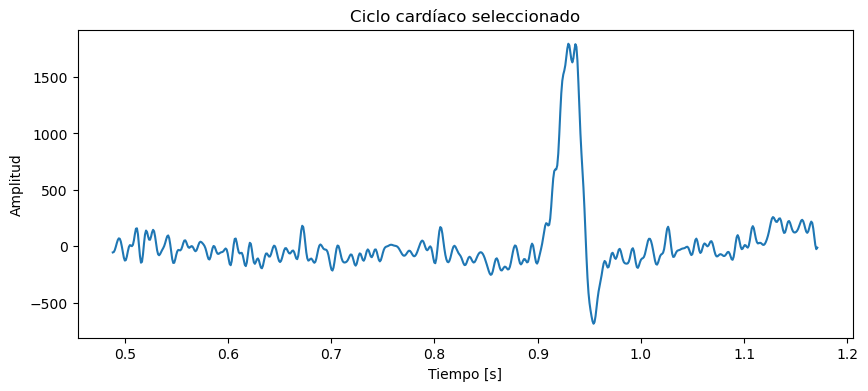

Promedio del ciclo (filtrado): 19.582181932193542
Valor RMS del ciclo (filtrado): 315.3546170327259
Varianza del ciclo (filtrado): 99065.07263463167
Desviación estándar del ciclo (filtrado): 314.7460446687641


In [15]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer las señales
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

# Calcular el RMS para la señal filtrada
rms_ecg_filtered = calcular_rms(ecg_filtered)

# Crear un vector de tiempo
sampling_rate = 1024  # Frecuencia de muestreo en Hz
n_samples = len(ecg_asRecording)
t = np.arange(n_samples) / sampling_rate

# Seleccionar un ciclo cardiaco manualmente
start_idx = 500  # Índice de inicio
end_idx = 1200   # Índice de fin

ecg_ciclo = ecg_filtered[start_idx:end_idx]  # Acceder correctamente a la señal
t_ciclo = t[start_idx:end_idx]

# Graficar el ciclo seleccionado
plt.figure(figsize=(10, 4))
plt.plot(t_ciclo, ecg_ciclo)
plt.title('Ciclo cardíaco seleccionado')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.show()

# Cálculo de estadísticas del ciclo
promedio = np.mean(ecg_ciclo)
rms = calcular_rms(ecg_ciclo)
varianza = np.var(ecg_ciclo)
desviacion_estandar = np.std(ecg_ciclo)

# Mostrar estadísticas del ciclo
print(f"Promedio del ciclo (filtrado): {promedio}")
print(f"Valor RMS del ciclo (filtrado): {rms}")
print(f"Varianza del ciclo (filtrado): {varianza}")
print(f"Desviación estándar del ciclo (filtrado): {desviacion_estandar}")

# Analisis
El filtrado ha tenido un impacto claro en los resultados estadísticos del ciclo de ECG. En comparación con el ciclo de la señal original, el promedio del ciclo filtrado es mucho menor, cercano a cero. Esto indica que el filtro ha eliminado el desplazamiento de la línea de base (offset), al reducir o eliminar el offset, la señal se centra en torno a un valor base, que debería estar en cero para una señal ECG filtrada correctamente, lo cual es crucial para el análisis correcto de los componentes de la señal ECG. El valor RMS se ha reducido significativamente en comparación con la señal original, esto sugiere que la magnitud efectiva de la señal se ha concentrado en las variaciones importantes (ondas P, QRS y T) y que las contribuciones de ruido de baja frecuencia y desplazamientos han sido removidas. A pesar de la reducción en el promedio y RMS, la varianza y la desviación estándar del ciclo filtrado sigue siendo elevada. Esto indica que las oscilaciones dentro del ciclo aún están presentes, ya que las componentes útiles de la señal, como el complejo QRS, siguen mostrando variaciones de amplitud significativa. Esto es coherente con la naturaleza de la señal ECG, que sigue mostrando características rítmicas como las ondas del ciclo cardíaco, aunque el ruido y el offset se han eliminado.

# 5. Extracción de 15 ciclos y análisis

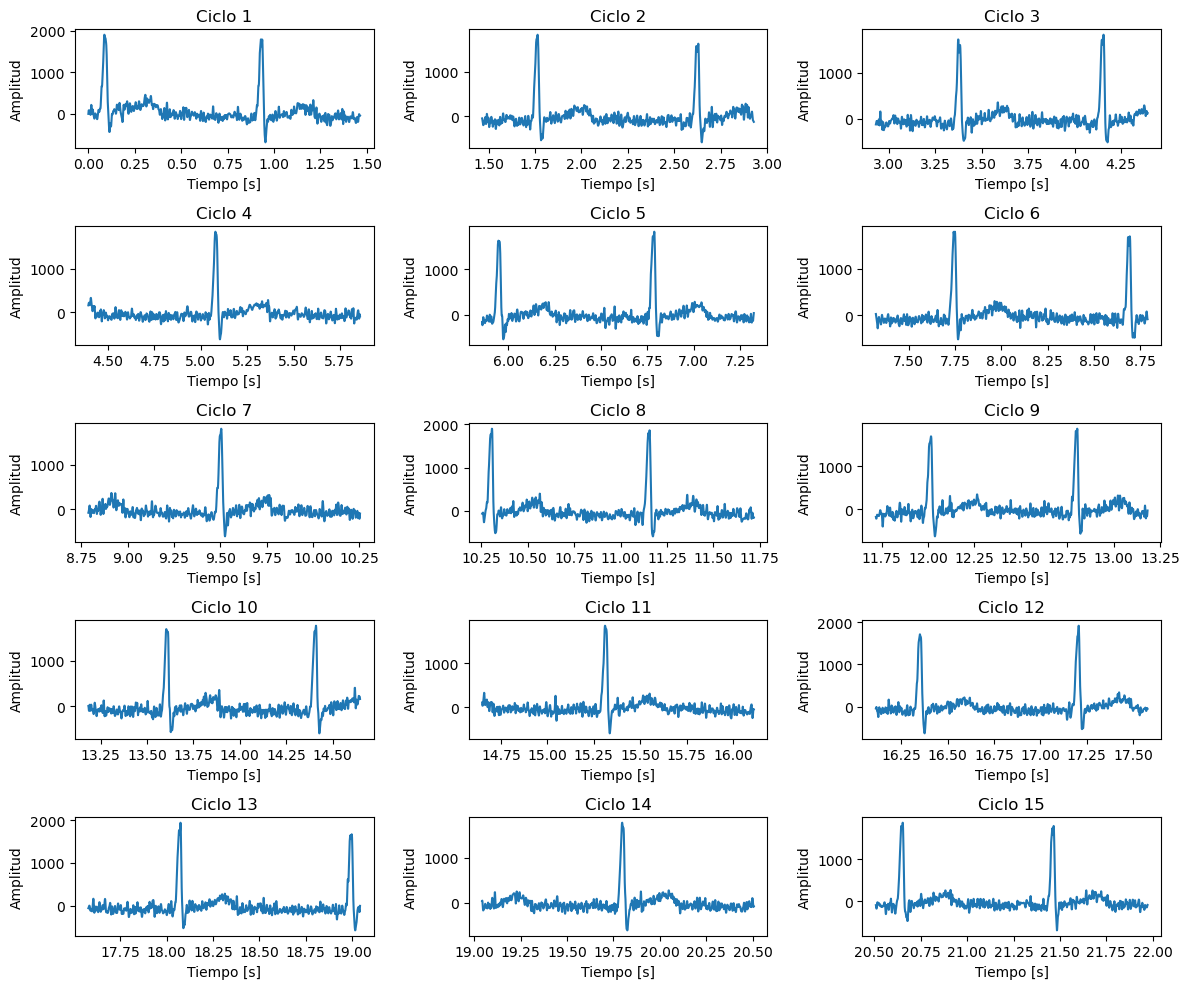

Ciclo 1: Promedio = 57.498355730271804, Varianza = 102395.32457358397
Ciclo 2: Promedio = -3.951454387070191, Varianza = 88715.87568323802
Ciclo 3: Promedio = 12.750120420592694, Varianza = 89186.82755666124
Ciclo 4: Promedio = -28.483056635674128, Varianza = 54710.791998246
Ciclo 5: Promedio = 17.54803252867953, Varianza = 85948.27657343462
Ciclo 6: Promedio = -2.223268363010667, Varianza = 87320.4081954131
Ciclo 7: Promedio = -15.791364924726285, Varianza = 51303.64747843788
Ciclo 8: Promedio = 8.310190933678243, Varianza = 100125.41002067788
Ciclo 9: Promedio = 18.500945183714947, Varianza = 90749.34323813452
Ciclo 10: Promedio = -10.695543010952967, Varianza = 90327.30462218999
Ciclo 11: Promedio = -6.308787461651917, Varianza = 53295.91166338673
Ciclo 12: Promedio = 12.560003012371613, Varianza = 91333.79817099686
Ciclo 13: Promedio = -7.877281405563507, Varianza = 90830.0653800081
Ciclo 14: Promedio = -8.392336327365832, Varianza = 50656.86575568384
Ciclo 15: Promedio = 6.4694978

In [35]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer la señal ECG filtrada
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

# Crear un vector de tiempo
sampling_rate = 1024  # Frecuencia de muestreo en Hz
n_samples = len(ecg_filtered)
t = np.arange(n_samples) / sampling_rate

# Parámetros para los ciclos
ciclo_duracion = 1500
n_ciclos = 15

promedios = []
varianzas = []

# Graficar cada ciclo y calcular estadísticas
plt.figure(figsize=(12, 10))
for i in range(n_ciclos):
    start_idx = i * ciclo_duracion
    end_idx = start_idx + ciclo_duracion
    
    ecg_ciclo = ecg_filtered[start_idx:end_idx]
    t_ciclo = t[start_idx:end_idx]
    
    promedio = np.mean(ecg_ciclo)
    varianza = np.var(ecg_ciclo)
    promedios.append(promedio)
    varianzas.append(varianza)
    
    # Graficar el ciclo
    plt.subplot(5, 3, i + 1)
    plt.plot(t_ciclo, ecg_ciclo)
    plt.title(f'Ciclo {i+1}')
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Amplitud')
    plt.tight_layout()

plt.show()

# Mostrar los resultados de promedio y varianza
for i in range(n_ciclos):
    print(f"Ciclo {i+1}: Promedio = {promedios[i]}, Varianza = {varianzas[i]}")

# Analisis
Los ciclos muestran variaciones en su promedio y varianza a lo largo del tiempo, lo que sugiere que la señal no tiene un comportamiento completamente constante o uniforme. Las diferencias entre ciclos indican que hay fluctuaciones en los niveles de amplitud de la señal, así como en la dispersión de los datos. Estas fluctuaciones son particularmente visibles en las diferencias de promedios entre ciclos, que varían de valores positivos a negativos.

El promedio de los ciclos oscila entre valores positivos y negativos. Mientras algunos ciclos tienen promedios cercanos a cero (Ciclo 2, Ciclo 6), otros muestran valores más alejados (Ciclo 1 con 57.5, Ciclo 4 con -28.5). Esto indica que la señal no mantiene un nivel de amplitud constante y fluctúa de manera significativa a lo largo del tiempo. La varianza, que mide la dispersión de los datos respecto al promedio, también muestra fluctuaciones importantes. La señal tiene ciclos con varianzas relativamente bajas, como el Ciclo 7 (51303) y el Ciclo 14 (50656), mientras que otros ciclos, como el Ciclo 1 (102395) y el Ciclo 15 (92558), presentan una mayor dispersión en los valores de la señal.

# ¿Puede considerarse como una señal estacionaria?
La estacionariedad en una señal implica que las propiedades estadísticas (como el promedio, la varianza, la autocorrelación, etc.) no cambian con el tiempo, es decir, son constantes a lo largo de la señal.

En este caso, las fluctuaciones significativas tanto en el promedio como en la varianza sugieren que la señal no es completamente estacionaria. La variabilidad en estas estadísticas a lo largo de los ciclos indica que las características de la señal cambian con el tiempo. Por lo tanto, no se puede considerar que la señal es estacionaria debido a la falta de constancia en las propiedades estadísticas observadas. Los cambios en los promedios y las varianzas muestran que la señal tiene comportamientos dinámicos que varían con el tiempo, lo cual es un indicativo de no estacionariedad.

# referencia
- https://musiki.org.ar/Se%C3%B1al_estacionaria_peri%C3%B3dica/cuasi_peri%C3%B3dica

# 6. Prueba t para comparación entre ciclos

In [18]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer la señal ECG filtrada
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

start_idx = 500
end_idx = 2000

# Definiendo de los ciclos a comparar
ecg_ciclo1 = ecg_filtered[start_idx*2:end_idx*2]
ecg_ciclo2 = ecg_filtered[start_idx*4:end_idx*4]
ecg_ciclo3 = ecg_filtered[start_idx*3:end_idx*3]
ecg_ciclo4 = ecg_filtered[start_idx*5:end_idx*5]

# Prueba de normalidad (Shapiro-Wilk) para ambos ciclos
shapiro_ciclo1 = shapiro(ecg_ciclo1)
shapiro_ciclo2 = shapiro(ecg_ciclo2)
shapiro_ciclo3 = shapiro(ecg_ciclo3)
shapiro_ciclo4 = shapiro(ecg_ciclo4)

print(f"Prueba de Shapiro-Wilk para Ciclo 1: p-valor = {shapiro_ciclo1.pvalue}")
print(f"Prueba de Shapiro-Wilk para Ciclo 2: p-valor = {shapiro_ciclo2.pvalue}")
print(f"Prueba de Shapiro-Wilk para Ciclo 3: p-valor = {shapiro_ciclo3.pvalue}")
print(f"Prueba de Shapiro-Wilk para Ciclo 4: p-valor = {shapiro_ciclo4.pvalue}")

# Prueba de Levene para homocedasticidad
levene_test = levene(ecg_ciclo1, ecg_ciclo2)
print(f"\nPrimera prueba de Levene para homocedasticidad Ciclo 1 vs Ciclo 2: p-valor = {levene_test.pvalue}")

levene_test2 = levene(ecg_ciclo3, ecg_ciclo4)
print(f"Segunda prueba de Levene para homocedasticidad Ciclo 3 vs Ciclo 4: p-valor = {levene_test2.pvalue}")

print("\n Primera comparacion: Ciclo 1 vs Ciclo 2")
# Si ambos ciclos son normales y tienen varianzas iguales, se realiza la prueba t
if shapiro_ciclo1.pvalue > 0.05 and shapiro_ciclo2.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_test = ttest_ind(ecg_ciclo1, ecg_ciclo2)
    print(f"Prueba t para muestras independientes: p-valor = {t_test.pvalue}")
else:
    # Si no se cumplen los supuestos, realizamos la prueba no paramétrica Mann-Whitney U
    mannwhitney_test = mannwhitneyu(ecg_ciclo1, ecg_ciclo2)
    print(f"Prueba U de Mann-Whitney: p-valor = {mannwhitney_test.pvalue}")

print("\n Segunda comparacion: Ciclo 3 vs Ciclo 4")
if shapiro_ciclo3.pvalue > 0.05 and shapiro_ciclo4.pvalue > 0.05 and levene_test.pvalue > 0.05:
    t_test = ttest_ind(ecg_ciclo3, ecg_ciclo4)
    print(f"Prueba t para muestras independientes: p-valor = {t_test.pvalue}")
else:
    mannwhitney_test = mannwhitneyu(ecg_ciclo3, ecg_ciclo4)
    print(f"Prueba U de Mann-Whitney: p-valor = {mannwhitney_test.pvalue}")

Prueba de Shapiro-Wilk para Ciclo 1: p-valor = 0.0
Prueba de Shapiro-Wilk para Ciclo 2: p-valor = 0.0
Prueba de Shapiro-Wilk para Ciclo 3: p-valor = 0.0
Prueba de Shapiro-Wilk para Ciclo 4: p-valor = 0.0

Primera prueba de Levene para homocedasticidad Ciclo 1 vs Ciclo 2: p-valor = 0.4857817130040274
Segunda prueba de Levene para homocedasticidad Ciclo 3 vs Ciclo 4: p-valor = 0.4646658989192738

 Primera comparacion: Ciclo 1 vs Ciclo 2
Prueba U de Mann-Whitney: p-valor = 0.7226738198303659

 Segunda comparacion: Ciclo 3 vs Ciclo 4
Prueba U de Mann-Whitney: p-valor = 0.0007541477317550416


# Analisis de los resultados
- Prueba de Shapiro wilk: Para todos los ciclos evaluados (Ciclo 1, Ciclo 2, Ciclo 3 y Ciclo 4), los p-valores son 0.0, lo que indica que se rechaza la hipótesis nula de que los datos siguen una distribución normal. Esto implica que los ciclos no siguen una distribución normal, por lo que no es apropiado utilizar una prueba t tradicional. Esto nos lleva a optar por una prueba no paramétrica como la prueba U de Mann-Whitney, que no asume normalidad.
- Prueba de Levene: La primera prueba de Levene (Ciclo 1 vs Ciclo 2) dio un p-valor de 0.4858, lo que indica que no hay evidencia de que las varianzas sean significativamente diferentes. Por lo tanto, podemos asumir que hay igualdad de varianzas (homocedasticidad) para estos dos ciclos. La segunda prueba de Levene (Ciclo 3 vs Ciclo 4) dio un p-valor de 0.4647, lo que también indica que las varianzas de estos ciclos son estadísticamente iguales.

Nota: las varianzas son homogéneas, pero debido a la falta de normalidad, recurrimos a la prueba U de Mann-Whitney.

- Prueba de U de Mann-Whitney: Primera comparación (Ciclo 1 vs Ciclo 2): El p-valor es 0.7227, lo que indica que no existe una diferencia estadísticamente significativa entre los dos ciclos. Esto sugiere que, a nivel estadístico, los valores de estos dos ciclos son similares, lo que podría ser un indicio de cierta estacionariedad entre estos dos ciclos. Segunda comparación (Ciclo 3 vs Ciclo 4): El p-valor es 0.00075, lo que significa que sí existe una diferencia estadísticamente significativa entre estos dos ciclos. Esto indica que los ciclos no son similares y que hay variaciones importantes entre ellos, lo que refuerza la idea de que la señal no es estacionaria.

Aunque algunos ciclos (como Ciclo 1 vs Ciclo 2) no muestran diferencias significativas, la presencia de ciclos que sí difieren (Ciclo 3 vs Ciclo 4) implica que hay cambios en la distribución de los datos en diferentes partes de la señal, la prueba U de Mann-Whitney, junto con la evidencia de no normalidad y las diferencias entre ciclos, sugiere que la señal de ECG no mantiene características constantes a lo largo del tiempo, confirmando que la señal no es estacionara.

# referencias
- https://rpubs.com/F3rnando/507482
- https://datatab.es/tutorial/levene-test
- https://datatab.es/tutorial/mann-whitney-u-test

# prueba de Dickey-Fuller

In [19]:
archivo = scipy.io.loadmat('signals.mat')

# Extraer la señal ECG filtrada
ecg_filtered = archivo['ECG_filtered'].flatten()  # Señal ECG filtrada

# Realizar la prueba de Dickey-Fuller sobre toda la señal de ECG Filtrada
resultado_adf = adfuller(ecg_filtered)

# Mostrar los resultados
print('Estadístico ADF:', resultado_adf[0])
print('p-valor:', resultado_adf[1])
print('Valores críticos:')
for key, value in resultado_adf[4].items():
    print(f'{key}: {value}')

Estadístico ADF: -8.334143088981413
p-valor: 3.307133349487674e-13
Valores críticos:
1%: -3.430563017388414
5%: -2.8616341480066874
10%: -2.566820112097176


# Analisis Prueba Dickey-Fuller
El p-valor es extremadamente bajo, muy cercano a cero, lo que indica que es altamente improbable que la señal tenga una raíz unitaria. Dado que el p-valor es significativamente menor que el umbral de significancia común (0.05), podemos rechazar la hipótesis nula de que la señal tiene una raíz unitaria (es decir, que no es estacionaria), por lo que la prueba Dickey-Fuller sugiere que la señal es estacionaria.

El estadístico Dickey-Fuller es -8.334, que es mucho más negativo que los valores críticos en todos los niveles (1%, 5%, 10%). Esto refuerza la conclusión de que podemos rechazar la hipótesis nula. Al comparar con el valor crítico del 1% (-3.431), vemos que el estadístico Dickey-Fuller es más bajo, lo que indica una evidencia aún más fuerte de estacionariedad.

La prueba de Dickey-Fuller concluye que la señal de ECG es estacionaria. Este resultado es en contraste con los análisis anteriores que sugerían que la señal no era estacionaria, especialmente debido a las diferencias observadas entre ciclos y la falta de normalidad.

Aunque la señal muestra diferencias significativas entre algunos ciclos (como se evidenció en la prueba U de Mann-Whitney), la prueba de Dickey-Fuller analiza la señal completa, buscando la presencia de tendencias generales o fluctuaciones persistentes. Puede ser que la señal sea globalmente estacionaria, pero con variaciones locales o fluctuaciones pequeñas que provocan esas diferencias entre ciclos. Esto indica que aunque estadísticamente la señal es estacionaria a gran escala, la presencia de ciclos con diferencias podría deberse a componentes no estacionarios de menor escala o ruido, lo que influye en las pruebas de comparación de ciclos.

# referencia
- https://rpubs.com/JessicaCuellar/843574